# Анализ частотности для типов транспортных средств


In [1]:
import pandas as pd
from collections import Counter
from pymystem3 import Mystem
from nltk.util import ngrams
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from nltk.corpus import stopwords
import nltk

# Загрузка стоп-слов
nltk.download('stopwords')
russian_stopwords = set(stopwords.words('russian'))

# Добавление специфичных стоп-слов
additional_stopwords = {'с', 'для', 'на', 'в', 'и', 'по', 'из', 'от', 'к', 'за'}
russian_stopwords.update(additional_stopwords)

# Настройка отображения графиков
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 12

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sergeymuravskiy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Загрузка и подготовка данных

In [2]:
# Загрузка данных
df = pd.read_csv('input_table.csv', sep=';')
print(df.head())
print(f"Всего записей: {len(df)}")

# Инициализация Mystem
m = Mystem()

# Функция для лемматизации и токенизации с удалением стоп-слов
def preprocess(text):
    lemmas = m.lemmatize(text.lower())
    return [lemma for lemma in lemmas if lemma.strip() and lemma.isalnum() and lemma not in russian_stopwords]

# Обработка всех названий
all_lemmas = []
for name in df['Name']:
    all_lemmas.extend(preprocess(name))

print(f"Всего лемм: {len(all_lemmas)}")
print(f"Уникальных лемм: {len(set(all_lemmas))}")

   Id     Version  TypeId                      Name  IsActive
0   1  4023045752       1         Грузовой-бортовой      True
1   2  4023045752       1                     Пикап      True
2   3  4023045752       3      Бронированный фургон      True
3   4  4023045752       3  Грузопассажирский фургон      True
4   5  4023045752       3     Изотермический фургон      True
Всего записей: 1474
Всего лемм: 4153
Уникальных лемм: 677


## Анализ частотности отдельных слов

In [3]:
# Анализ частотности отдельных слов
word_freq = Counter(all_lemmas)

print("Топ-20 слов:")
for word, freq in word_freq.most_common(20):
    print(f"{word}: {freq}")

Топ-20 слов:
специальный: 201
машина: 121
погрузчик: 117
специализированный: 112
прицеп: 107
автомобиль: 107
самоходный: 95
полуприцеп: 81
установка: 76
колесный: 69
перевозка: 59
гусеничный: 59
экскаватор: 57
кму: 54
кран: 52
грузовой: 51
бортовой: 51
фургон: 51
подъемник: 45
фронтальный: 40


## Анализ биграмм и триграмм

In [4]:
# Анализ биграмм и триграмм
bigrams = list(ngrams(all_lemmas, 2))
trigrams = list(ngrams(all_lemmas, 3))

bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

print("Топ-10 биграмм:")
for bigram, freq in bigram_freq.most_common(10):
    print(f"{' '.join(bigram)}: {freq}")

print("\nТоп-10 триграмм:")
for trigram, freq in trigram_freq.most_common(10):
    print(f"{' '.join(trigram)}: {freq}")

Топ-10 биграмм:
специализированный перевозка: 22
кран манипулятор: 21
рабочий платформа: 17
специальный автомобиль: 15
автомобиль фургон: 14
специализированный прицеп: 14
гусеничный ход: 14
специальный передвижной: 14
каток дорожный: 13
прицеп тракторный: 12

Топ-10 триграмм:
оснащать кран манипулятор: 9
подъемник рабочий платформа: 9
погрузчик колесный ход: 6
перевозка сменный кузов: 5
кран манипулятор специальный: 5
погрузчик бортовый поворот: 5
специализированный транспортный средство: 5
транспортный средство перевозка: 5
экскаватор одноковшовый гусеничный: 4
перевозка опасный груз: 4


## Визуализация результатов

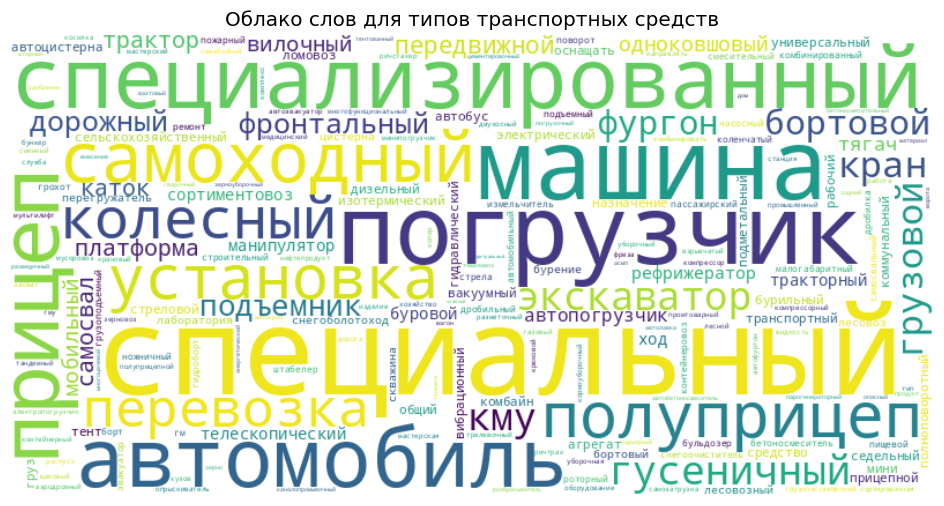

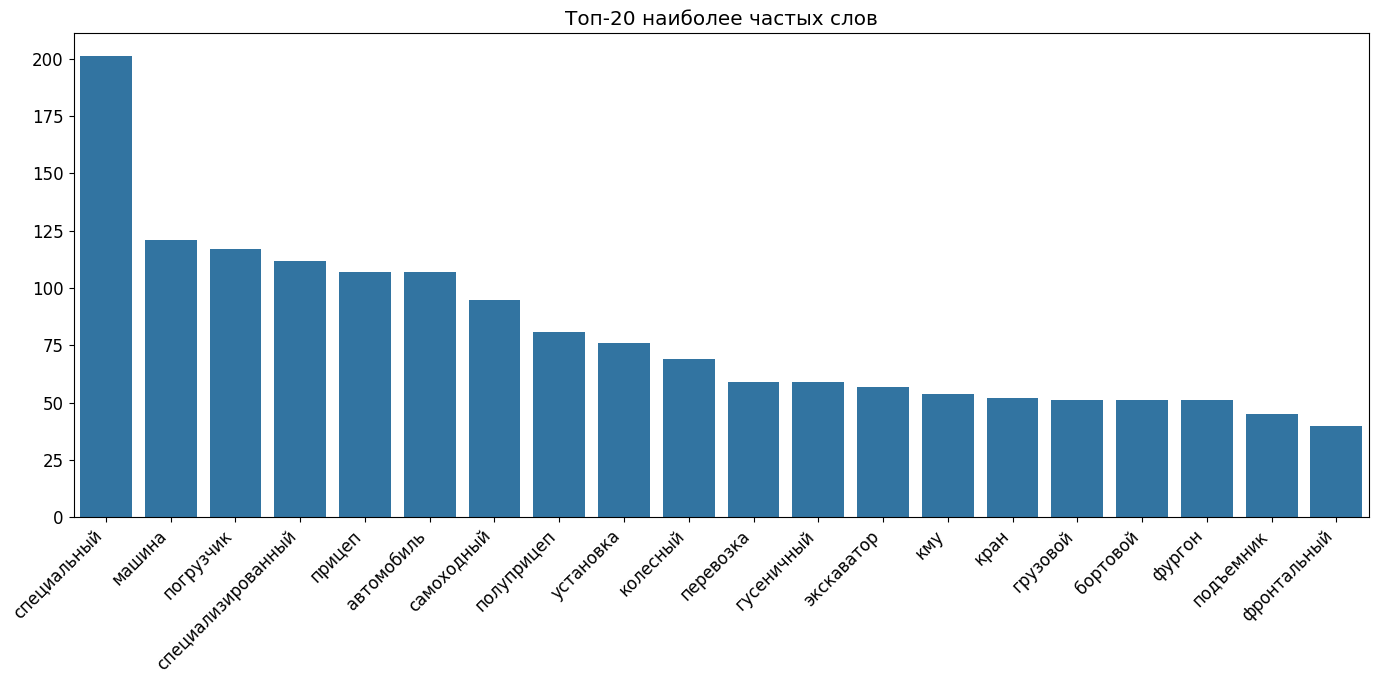

In [5]:
# Облако слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Облако слов для типов транспортных средств')
plt.show()

# Гистограмма топ-20 слов
top_20_words = dict(word_freq.most_common(20))
plt.figure(figsize=(14, 7))
sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()))
plt.xticks(rotation=45, ha='right')
plt.title('Топ-20 наиболее частых слов')
plt.tight_layout()
plt.show()

## Группировка по частотности

In [6]:
def group_by_frequency(freq_dict):
    groups = {}
    for item, freq in freq_dict.items():
        if freq not in groups:
            groups[freq] = []
        groups[freq].append(item)
    return groups

word_groups = group_by_frequency(word_freq)
bigram_groups = group_by_frequency(bigram_freq)

print("Группировка слов по частотности:")
for freq, words in sorted(word_groups.items(), reverse=True)[:10]:
    print(f"Частота {freq}: {', '.join(words)}")

print("\nГруппировка биграмм по частотности:")
for freq, bigrams in sorted(bigram_groups.items(), reverse=True)[:10]:
    print(f"Частота {freq}: {', '.join([' '.join(bg) for bg in bigrams])}")

Группировка слов по частотности:
Частота 201: специальный
Частота 121: машина
Частота 117: погрузчик
Частота 112: специализированный
Частота 107: прицеп, автомобиль
Частота 95: самоходный
Частота 81: полуприцеп
Частота 76: установка
Частота 69: колесный
Частота 59: перевозка, гусеничный

Группировка биграмм по частотности:
Частота 22: специализированный перевозка
Частота 21: кран манипулятор
Частота 17: рабочий платформа
Частота 15: специальный автомобиль
Частота 14: автомобиль фургон, специализированный прицеп, гусеничный ход, специальный передвижной
Частота 13: каток дорожный
Частота 12: прицеп тракторный, общий назначение, транспортный средство, специальный машина
Частота 11: грузовой бортовой, погрузчик фронтальный, специализированный автомобиль, погрузчик колесный
Частота 10: фургон изотермический, буровой установка, кран стреловой
Частота 9: седельный тягач, экскаватор одноковшовый, экскаватор погрузчик, автомобиль бортовой, оснащать кран, фургон рефрижератор, колесный ход, подъе

## Единый список повторяемых слов, биграмм и триграмм

In [7]:
def get_repeated_items(freq_dict, min_frequency=2):
    return [item for item, freq in freq_dict.items() if freq >= min_frequency]

repeated_words = get_repeated_items(word_freq)
repeated_bigrams = get_repeated_items(bigram_freq)
repeated_trigrams = get_repeated_items(trigram_freq)

print("Единый список повторяемых слов, биграмм и триграмм:")
print("\nПовторяемые слова:")
for word in repeated_words:
    print(f"{word}: {word_freq[word]}")

print("\nПовторяемые биграммы:")
for bigram in repeated_bigrams:
    print(f"{' '.join(bigram)}: {bigram_freq[bigram]}")

print("\nПовторяемые триграммы:")
for trigram in repeated_trigrams:
    print(f"{' '.join(trigram)}: {trigram_freq[trigram]}")

Единый список повторяемых слов, биграмм и триграмм:

Повторяемые слова:
грузовой: 51
бортовой: 51
фургон: 51
грузопассажирский: 5
изотермический: 20
промтоварный: 5
хлебный: 3
цельнометаллический: 2
седельный: 15
тягач: 29
автобус: 18
перевозка: 59
ребенок: 2
вахтовый: 4
городской: 2
ритуальный: 3
автобетононасос: 3
автобетоносмеситель: 4
автогудронатор: 3
автоцистерна: 19
нефтепродукт: 5
пищевой: 8
прицеп: 107
рефрижератор: 27
лесовоз: 10
мусоровоз: 6
сортиментовоз: 22
установка: 76
насосный: 7
цементировочный: 4
агрегат: 18
катафалк: 3
автомобиль: 107
скорый: 2
помощь: 2
автокран: 4
бурильный: 14
крановый: 5
тс: 3
фронтальный: 40
вилочный: 34
автопогрузчик: 29
топливозаправщик: 3
аварийный: 3
автолавка: 4
автомастерская: 3
специальный: 201
парогенераторный: 4
платформа: 37
кму: 54
мультилифт: 6
самосвал: 37
эвакуатор: 7
дизель: 2
генератор: 2
компрессор: 5
самосвальный: 7
цистерна: 11
контейнеровоз: 9
прицепной: 14
ремонт: 8
дорога: 6
роспуск: 5
полуприцеп: 81
автовоз: 2
зерновоз: 5


## Сохранение результатов

In [8]:
# Сохранение результатов в CSV
pd.DataFrame(word_freq.most_common(), columns=['Слово', 'Частота']).to_csv('word_frequency.csv', index=False)
pd.DataFrame(bigram_freq.most_common(), columns=['Биграмма', 'Частота']).to_csv('bigram_frequency.csv', index=False)
pd.DataFrame(trigram_freq.most_common(), columns=['Триграмма', 'Частота']).to_csv('trigram_frequency.csv', index=False)

# Сохранение единого списка повторяемых элементов в CSV
repeated_items_data = [
    ['Слово', word, word_freq[word]] for word in repeated_words
] + [
    ['Биграмма', ' '.join(bigram), bigram_freq[bigram]] for bigram in repeated_bigrams
] + [
    ['Триграмма', ' '.join(trigram), trigram_freq[trigram]] for trigram in repeated_trigrams
]

pd.DataFrame(repeated_items_data, columns=['Тип', 'Элемент', 'Частота']).to_csv('repeated_items.csv', index=False)

print("Результаты сохранены в CSV файлы: word_frequency.csv, bigram_frequency.csv, trigram_frequency.csv и repeated_items.csv.")

Результаты сохранены в CSV файлы: word_frequency.csv, bigram_frequency.csv, trigram_frequency.csv и repeated_items.csv.
